In [1]:
import sys
import os
import math
import numpy as np
sys.path.append('.')
import pickle
import CellModeller
import json
import matplotlib.pyplot as plt
import cv2
from scipy.signal import correlate, find_peaks

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 7, 7

#### open an existing file, so no need to generate database

In [2]:
with open('data_contDeg03.json') as json_file:  
    database = json.load(json_file)

In [4]:
path = '../Data/repressilator_gillespie/'
files = os.listdir(path)
files.sort()
# not consider model file
files = files[1:]

In [5]:
files

['step-00000.pickle',
 'step-00050.pickle',
 'step-00100.pickle',
 'step-00150.pickle',
 'step-00200.pickle',
 'step-00250.pickle',
 'step-00300.pickle',
 'step-00350.pickle',
 'step-00400.pickle',
 'step-00450.pickle',
 'step-00500.pickle',
 'step-00550.pickle',
 'step-00600.pickle',
 'step-00650.pickle']

In [31]:
database = []
width = 3
for f in files[1:]:
    print(f)
    data = pickle.load(open(path+f,'rb'))
    cs = data['cellStates']
    it = iter(cs)
    
    pos_x = np.array([cs[it].pos[0] for it in cs])
    pos_y = np.array([cs[it].pos[1] for it in cs])
    
    # radial space
    r_cells = np.sqrt(pos_x**2 + pos_y**2)
    
    r_cells = np.array([np.sqrt(cs[it].pos[0]**2+cs[it].pos[1]**2) for it in cs])
    R_cells = np.array([cs[it].color[0] for it in cs])
    G_cells = np.array([cs[it].color[1] for it in cs])
    B_cells = np.array([cs[it].color[2] for it in cs])
    
    
    #print(f"Index: {i}, max_rad:{r_cells.max()}")
    nbins = int(r.max() // width)
    bins_acc = []
    R_acc = []
    G_acc = []
    B_acc = []
    for dr in range(nbins):
        bins_acc.append(dr*width)
        
        idx = np.where((r_cells > dr*width)*(r_cells < (dr+1)*width))
        R_acc.append(np.mean(R_cells[idx]))
        G_acc.append(np.mean(G_cells[idx]))
        B_acc.append(np.mean(B_cells[idx]))
        
    database.append([bins_acc, R_acc, G_acc, B_acc])


"""
database = []
width = 5
# each picke file
for f in files[1:]:
    print(f)
    data = pickle.load(open(path+f,'rb'))
    cs = data['cellStates']
    it = iter(cs)
    
    pos_x = [cs[it].pos[0] for it in cs]
    pos_y = [cs[it].pos[1] for it in cs]
    
    xmax = math.ceil(max(pos_x))
    ymax = math.ceil(max(pos_y))
    
    grid_size = max(xmax, ymax)
    xx = np.arange(grid_size)
    yy = np.arange(grid_size)
    y,x = np.meshgrid(xx,yy)
    c = grid_size / 2 - 1/2, grid_size / 2-1/2
    
    
    # radial space
    r = np.sqrt((x-c[0])**2 + (y-c[1])**2) 
    
    r_cells = np.array([np.sqrt(cs[it].pos[0]**2+cs[it].pos[1]**2) for it in cs])
    R_cells = np.array([cs[it].color[0] for it in cs])
    G_cells = np.array([cs[it].color[1] for it in cs])
    B_cells = np.array([cs[it].color[2] for it in cs])
    
    nbins = int(r.max() // width)
    bins_acc = []
    R_acc = []
    G_acc = []
    B_acc = []
    for dr in range(nbins):
        bins_acc.append(dr*width)
        
        idx = np.where((r_cells > dr*width)*(r_cells < (dr+1)*width))
        R_acc.append(np.mean(R_cells[idx]))
        G_acc.append(np.mean(G_cells[idx]))
        B_acc.append(np.mean(B_cells[idx]))
        
    database.append([bins_acc, R_acc, G_acc, B_acc])
    """

step-00050.pickle
step-00100.pickle
step-00150.pickle
step-00200.pickle
step-00250.pickle
step-00300.pickle
step-00350.pickle
step-00400.pickle
step-00450.pickle
step-00500.pickle
step-00550.pickle
step-00600.pickle
step-00650.pickle


"\ndatabase = []\nwidth = 5\n# each picke file\nfor f in files[1:]:\n    print(f)\n    data = pickle.load(open(path+f,'rb'))\n    cs = data['cellStates']\n    it = iter(cs)\n    \n    pos_x = [cs[it].pos[0] for it in cs]\n    pos_y = [cs[it].pos[1] for it in cs]\n    \n    xmax = math.ceil(max(pos_x))\n    ymax = math.ceil(max(pos_y))\n    \n    grid_size = max(xmax, ymax)\n    xx = np.arange(grid_size)\n    yy = np.arange(grid_size)\n    y,x = np.meshgrid(xx,yy)\n    c = grid_size / 2 - 1/2, grid_size / 2-1/2\n    \n    \n    # radial space\n    r = np.sqrt((x-c[0])**2 + (y-c[1])**2) \n    \n    r_cells = np.array([np.sqrt(cs[it].pos[0]**2+cs[it].pos[1]**2) for it in cs])\n    R_cells = np.array([cs[it].color[0] for it in cs])\n    G_cells = np.array([cs[it].color[1] for it in cs])\n    B_cells = np.array([cs[it].color[2] for it in cs])\n    \n    nbins = int(r.max() // width)\n    bins_acc = []\n    R_acc = []\n    G_acc = []\n    B_acc = []\n    for dr in range(nbins):\n        bins

In [32]:
# extracting vectors from file
x = [d[0] for d in database]
R = [d[1] for d in database]
G = [d[2] for d in database]
B = [d[3] for d in database]

kymo = np.zeros([len(database), len(x[-1]), 3])
kymo[:] = np.nan
for i, x_vals in enumerate(x):
    kymo[i, :len(x_vals), 0] = R[i]
    kymo[i, :len(x_vals), 1] = G[i]
    kymo[i, :len(x_vals), 2] = B[i]

vals = kymo[:,:,0]
kymo[:,:,0] = vals / np.nanmax(vals)

vals = kymo[:,:,1]
kymo[:,:,1] = vals / np.nanmax(vals)

vals = kymo[:,:,2]
kymo[:,:,2] = vals / np.nanmax(vals)


# save file
#np.save(f"kymo_TEST_{file[13:-5]}.npy", kymo)

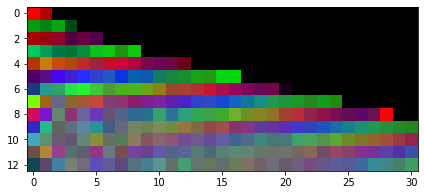

In [33]:
plt.imshow(kymo)

In [8]:
with open('data_gillespie.json', 'w') as outfile:  
    json.dump(database, outfile)

#### Open a file

In [20]:
#with open('data_contDeg03.json') as json_file:  
with open('data_gillespie.json') as json_file:  
    database = json.load(json_file)

In [21]:
x = [d[0] for d in database]
R = [d[1] for d in database]
G = [d[2] for d in database]
B = [d[3] for d in database]

In [22]:
kymo = np.zeros([len(database), len(x[-1]), 3])
for i, x_vals in enumerate(x):
    kymo[i, :len(x_vals), 0] = R[i]
    kymo[i, :len(x_vals), 1] = G[i]
    kymo[i, :len(x_vals), 2] = B[i]

vals = kymo[:,:,0]
kymo[:,:,0] = (vals-vals.min()) / (vals.max()-vals.min())

vals = kymo[:,:,1]
kymo[:,:,1] = (vals-vals.min()) / (vals.max()-vals.min())

vals = kymo[:,:,2]
kymo[:,:,2] = (vals-vals.min()) / (vals.max()-vals.min())

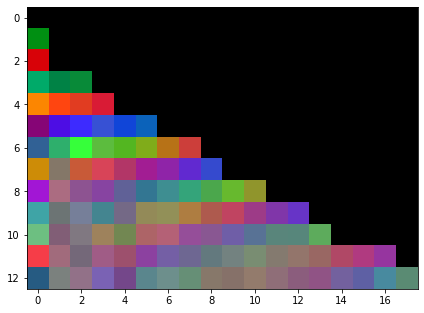

In [23]:
plt.imshow(kymo);

### Calculate speed

In [ ]:
nkymo = np.copy(kymo)
nkymo[nkymo[:, :, :]==0] = np.nan

plt.figure(figsize=(10, 10))
plt.imshow(nkymo[:,:,2])
pks_list = []

for i in range(1, 108, 3):
    nk = nkymo[i,1:-1,2]
    idx1 = ~np.isnan(nk)
    idx2 = ~np.isnan(nk)
    idx = idx1 * idx2 # times when both signals are within the colony
    nk = nk[idx]
    pks,_ = find_peaks(nk)
    pks_list.append(pks)
    for p in pks:
        if p>1 and p<len(nk)-2:
            plt.plot(p, i, 'w.')

In [ ]:
vels = []
dt = 15
for i in range(len(pks_list)-dt):
    pks = pks_list[i]
    next_pks = pks_list[i+dt]
    for pk in pks:
        # Find closest peak at next time point
        min_dist = 100
        for next_pk in next_pks:
            dist = np.abs(next_pk-pk)
            if dist<min_dist:
                min_dist = dist
        # Make a threshold to avoid wrap around effects
        if min_dist<10:
            vel = min_dist/dt
        else:
            vel = np.nan
        vels.append(vel)

print('Mean wave speed = ', np.nanmean(vels))

In [ ]:
plt.figure(figsize=(7, 7))
plt.imshow(kymo)
plt.plot(np.linspace(0,15,100), np.linspace(0,15,100) * (-1 / np.nanmean(vels)) + 107, 'k', linewidth=3);

### Speed, BAD way

In [ ]:
#steps = [1, 2, 3, 4, 5, 6, 7, 8, 9]
steps = [5]
chnls = [0, 1, 2]
vels_arr_c = []
for chnl in chnls:
    print("Channel ", chnl)
    vels_arr = []
    for step in steps:
        vels = []
        for col in range(kymo.shape[1]-step):
            c = correlate(kymo[:,col,chnl]-np.mean(kymo[:,col,chnl]), kymo[:,col,chnl]-np.mean(kymo[:,col,chnl]), mode='same')
            cc = correlate(kymo[:,col,chnl]-np.mean(kymo[:,col,chnl]), kymo[:,col+step,chnl]-np.mean(kymo[:,col+step,chnl]), mode='same')

            pks_c, _ = find_peaks(c)
            pks_cc, _ = find_peaks(cc)

            max_c = np.where(c[pks_c]==np.max(c[pks_c]))
            idx_max_c = max_c[0][0]
            t_c = pks_c[idx_max_c]

            max_cc = np.where(cc[pks_cc]==np.max(cc[pks_cc]))
            idx_max_cc = max_cc[0][0]
            t_cc = pks_cc[idx_max_cc]

            vel = (step)*5/((t_cc-t_c)*0.025*10)
            vels.append(vel)

        plt.plot(vels)
        vels_arr.append(vels)
        plt.title(f"step={step}")
        plt.show()
    vels_arr_c.append(vels_arr)

In [ ]:
## Observed in plots, the more stable plots:
# chnl 0
# step 5, 6
# chnl 1
# step 5
# chnl 2
# step 5

#### R

In [ ]:
plt.plot(vels_arr_c[0][4])

In [ ]:
np.mean(vels_arr_c[0][4][:20])

In [ ]:
plt.plot(vels_arr_c[0][5])

In [ ]:
np.mean(vels_arr_c[0][5][:20])

#### G

In [ ]:
plt.plot(vels_arr_c[1][4])

In [ ]:
np.mean(vels_arr_c[1][4][5:20])

#### B

In [ ]:
plt.plot(vels_arr_c[2][4])

In [ ]:
np.mean(vels_arr_c[2][4][5:20])

In [ ]:
path = 000 949

In [35]:
n = '4'
n.zfill(3)

'004'

In [39]:
idxs = [str(n).zfill(3) for n in range(0, 950, 10)]

['000',
 '010',
 '020',
 '030',
 '040',
 '050',
 '060',
 '070',
 '080',
 '090',
 '100',
 '110',
 '120',
 '130',
 '140',
 '150',
 '160',
 '170',
 '180',
 '190',
 '200',
 '210',
 '220',
 '230',
 '240',
 '250',
 '260',
 '270',
 '280',
 '290',
 '300',
 '310',
 '320',
 '330',
 '340',
 '350',
 '360',
 '370',
 '380',
 '390',
 '400',
 '410',
 '420',
 '430',
 '440',
 '450',
 '460',
 '470',
 '480',
 '490',
 '500',
 '510',
 '520',
 '530',
 '540',
 '550',
 '560',
 '570',
 '580',
 '590',
 '600',
 '610',
 '620',
 '630',
 '640',
 '650',
 '660',
 '670',
 '680',
 '690',
 '700',
 '710',
 '720',
 '730',
 '740',
 '750',
 '760',
 '770',
 '780',
 '790',
 '800',
 '810',
 '820',
 '830',
 '840',
 '850',
 '860',
 '870',
 '880',
 '890',
 '900',
 '910',
 '920',
 '930',
 '940']

In [ ]:
for file in [sims_files[0]]:
    start = time.time()
    with open(sims_path+file, 'rb') as jf:
        database = json.load(jf)
    end = time.time()
    
    print(f"Read file took {end-start} secs")
    
    for idx in idxs:
        data2 = pickle.load(open(pickle_path+f"step-00{idx}.pickle", 'rb'))
        concR = []
        concG = []
        concB = []
        for k in database[idx].keys():
            concR.append(database[idx][str(k)]['fluo'][0])
            concG.append(database[idx][str(k)]['fluo'][1])    
            concB.append(database[idx][str(k)]['fluo'][2])

        mr = max(concR)
        mg = max(concG)
        mb = max(concB)
        max_RGB = np.array([mr,mg,mb])

        start = time.time()
        for k in database[idx].keys():
            conc = np.array(database[idx][str(k)]['fluo']) / max_RGB
            data2['cellStates'][int(k)].color = conc.tolist()

        with open('pickles_video/0.3_10000.0/'+file[:-5]+'_'+idx+'.pickle', 'wb') as handle:
            pickle.dump(data2, handle, protocol=pickle.HIGHEST_PROTOCOL)
        end = time.time()
        print(f"Fix and storing file {idx} took {end-start} secs")